In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jellyfish-types/Train_Test_Valid/valid/Moon_jellyfish/20.jpg
/kaggle/input/jellyfish-types/Train_Test_Valid/valid/Moon_jellyfish/60.jpg
/kaggle/input/jellyfish-types/Train_Test_Valid/valid/Moon_jellyfish/44.jpg
/kaggle/input/jellyfish-types/Train_Test_Valid/valid/Moon_jellyfish/09.jpg
/kaggle/input/jellyfish-types/Train_Test_Valid/valid/Moon_jellyfish/15.jpg
/kaggle/input/jellyfish-types/Train_Test_Valid/valid/Moon_jellyfish/27.jpg
/kaggle/input/jellyfish-types/Train_Test_Valid/valid/blue_jellyfish/22.jpeg
/kaggle/input/jellyfish-types/Train_Test_Valid/valid/blue_jellyfish/30.jpg
/kaggle/input/jellyfish-types/Train_Test_Valid/valid/blue_jellyfish/35.jpg
/kaggle/input/jellyfish-types/Train_Test_Valid/valid/blue_jellyfish/16.jpg
/kaggle/input/jellyfish-types/Train_Test_Valid/valid/blue_jellyfish/48.jpg
/kaggle/input/jellyfish-types/Train_Test_Valid/valid/blue_jellyfish/05.jpg
/kaggle/input/jellyfish-types/Train_Test_Valid/valid/blue_jellyfish/12.jpeg
/kaggle/input/jellyfish

In [2]:
import os
import cv2
import numpy as np

categories = ['Moon_jellyfish', 'barrel_jellyfish', 'blue_jellyfish', 'compass_jellyfish', 'lions_mane_jellyfish', 'mauve_stinger_jellyfish']
train_directory = '/kaggle/input/jellyfish-types/Train_Test_Valid/Train'

image_list = []
for train_subcategory in os.listdir(train_directory):
    sub_train_directory = os.path.join(train_directory, train_subcategory)
    for image in os.listdir(sub_train_directory):
        image_inner = []
        image_path = os.path.join(sub_train_directory, image)
        img = cv2.imread(image_path)
        img_new = cv2.resize(img, (28,28))
        for pixel in img_new.flatten():
            image_inner.append(pixel)
        image_inner.append(train_subcategory) 
        image_list.append(image_inner)

In [3]:
import pandas as pd

df = pd.DataFrame(image_list)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,2352
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Moon_jellyfish
1,40,5,0,40,5,2,44,8,4,78,...,43,4,2,45,6,4,42,4,1,Moon_jellyfish
2,229,128,27,242,134,26,251,145,28,254,...,82,31,9,58,24,5,37,19,6,Moon_jellyfish
3,0,0,0,1,1,1,3,1,1,3,...,3,1,1,3,1,1,3,1,1,Moon_jellyfish
4,48,19,15,45,16,12,44,17,13,43,...,16,11,5,27,9,8,60,25,17,Moon_jellyfish


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[2352] = le.fit_transform(df[2352])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,2352
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40,5,0,40,5,2,44,8,4,78,...,43,4,2,45,6,4,42,4,1,0
2,229,128,27,242,134,26,251,145,28,254,...,82,31,9,58,24,5,37,19,6,0
3,0,0,0,1,1,1,3,1,1,3,...,3,1,1,3,1,1,3,1,1,0
4,48,19,15,45,16,12,44,17,13,43,...,16,11,5,27,9,8,60,25,17,0


In [5]:
X = df[::-1]
X = X/255.0
Y = df[2352]

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

**RANDOM FOREST CLASSIFIER**

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('Accuracy of RF: ', round(accuracy_score(y_test, y_pred), 2)*100, '%')

Accuracy of RF:  68.0 %


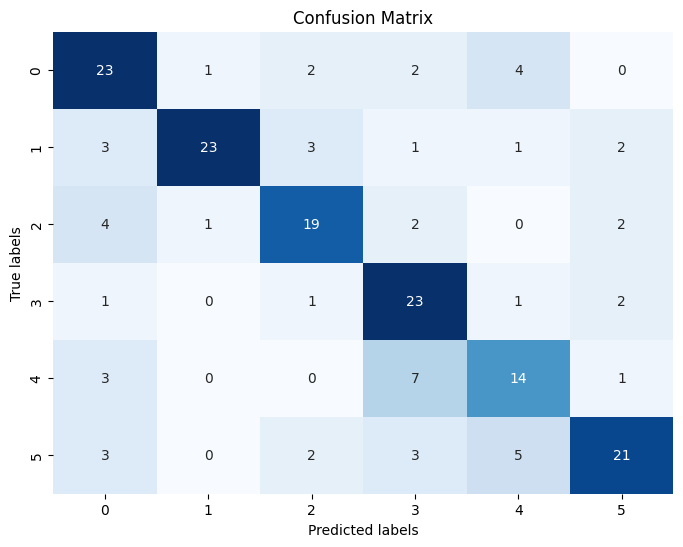

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.72      0.67        32
           1       0.92      0.70      0.79        33
           2       0.70      0.68      0.69        28
           3       0.61      0.82      0.70        28
           4       0.56      0.56      0.56        25
           5       0.75      0.62      0.68        34

    accuracy                           0.68       180
   macro avg       0.69      0.68      0.68       180
weighted avg       0.70      0.68      0.69       180



In [8]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))

**SUPPORT VECTOR MACHINE**

In [9]:
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc = svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print('Accuracy of SVM: ', round(accuracy_score(y_test, y_pred), 2)*100, '%')

Accuracy of SVM:  56.00000000000001 %


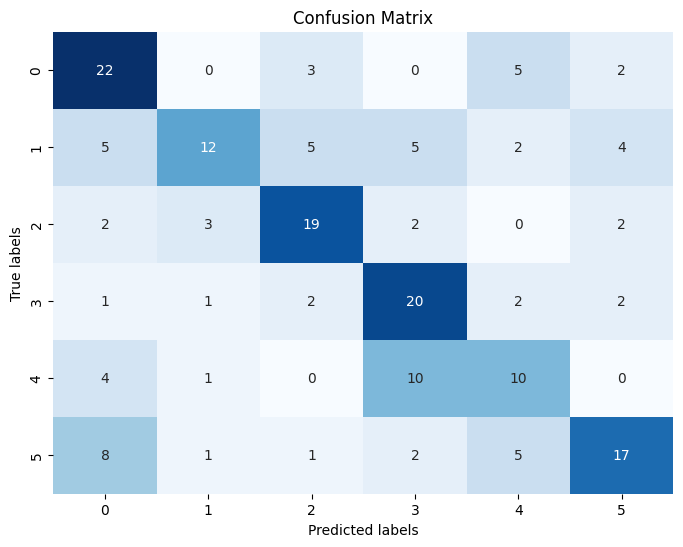

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.69      0.59        32
           1       0.67      0.36      0.47        33
           2       0.63      0.68      0.66        28
           3       0.51      0.71      0.60        28
           4       0.42      0.40      0.41        25
           5       0.63      0.50      0.56        34

    accuracy                           0.56       180
   macro avg       0.56      0.56      0.55       180
weighted avg       0.57      0.56      0.55       180



In [10]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))

**NAIVE BAYES CLASSIFIER**

In [11]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x_train, y_train)
y_pred = mnb.predict(x_test)
print('Accuracy of Multinomial Naive Bayes is: ', accuracy_score(y_test, y_pred)*100, '%')

Accuracy of Multinomial Naive Bayes is:  28.333333333333332 %


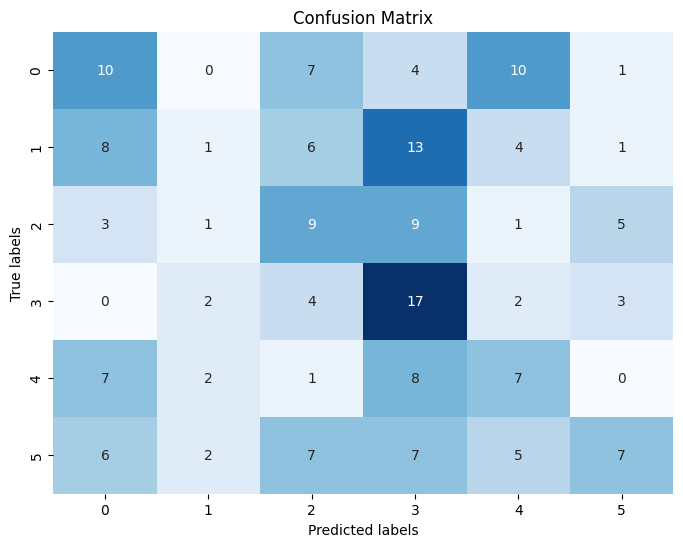

Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.31      0.30        32
           1       0.12      0.03      0.05        33
           2       0.26      0.32      0.29        28
           3       0.29      0.61      0.40        28
           4       0.24      0.28      0.26        25
           5       0.41      0.21      0.27        34

    accuracy                           0.28       180
   macro avg       0.27      0.29      0.26       180
weighted avg       0.27      0.28      0.26       180



In [12]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))

In [13]:
from sklearn.naive_bayes import ComplementNB

cnb = ComplementNB()
cnb.fit(x_train, y_train)
y_pred = cnb.predict(x_test)
print('Accuracy of Complement Naive Bayes is: ', accuracy_score(y_test, y_pred)*100, '%')

Accuracy of Complement Naive Bayes is:  28.333333333333332 %


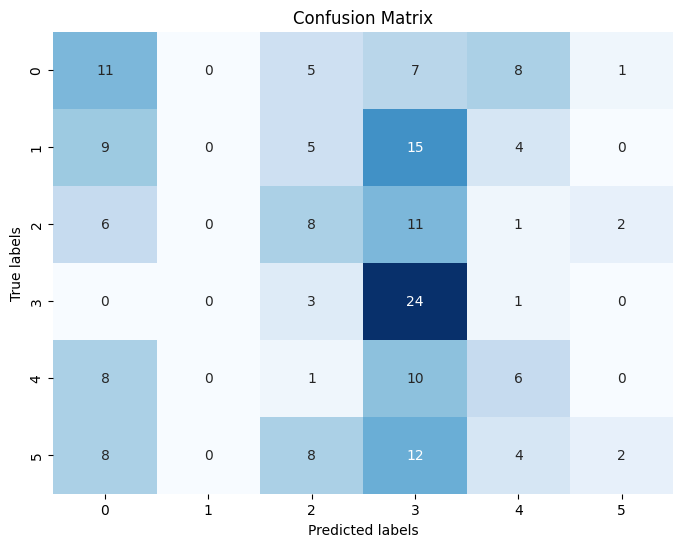

Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.34      0.30        32
           1       0.00      0.00      0.00        33
           2       0.27      0.29      0.28        28
           3       0.30      0.86      0.45        28
           4       0.25      0.24      0.24        25
           5       0.40      0.06      0.10        34

    accuracy                           0.28       180
   macro avg       0.25      0.30      0.23       180
weighted avg       0.25      0.28      0.22       180



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))

**CONVULUTIONAL NEURAL NETWORK**

In [15]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2024-04-22 10:18:33.086049: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 10:18:33.086176: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 10:18:33.252719: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [17]:
from keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D,Dropout
from keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50
from keras.models import Model,Sequential
from keras.models import load_model, save_model

In [18]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2,
                             rotation_range=10, width_shift_range = 0.1, height_shift_range=0.1,
                             shear_range=0.1, zoom_range=0.1, horizontal_flip=True)

train_generator = datagen.flow_from_directory('/kaggle/input/jellyfish-types/Train_Test_Valid/Train', target_size=(224,224), batch_size=32,
                                              class_mode="categorical", subset='training')

validation_generator = datagen.flow_from_directory('/kaggle/input/jellyfish-types/Train_Test_Valid/valid', target_size=(224,224), batch_size=32,
                                              class_mode="categorical", subset='validation')

Found 720 images belonging to 6 classes.
Found 6 images belonging to 6 classes.


In [19]:
from keras.applications import ResNet50
#Loading the ResNet50 model with pre-trained ImageNet weights
resnet = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [20]:
for layer in resnet.layers[:147]:
   layer.trainable = False

In [26]:
from keras import layers, models
from keras.models import Sequential
from keras.regularizers import l2

model = Sequential()

model.add(resnet)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(layers.Dense(6, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 12,090,368 (46.12 MB)

 Non-trainable params: 11,497,344 (43.86 MB)

In [27]:
from keras import optimizers, callbacks
model.compile(loss='categorical_crossentropy',
     optimizer=optimizers.Adam(learning_rate=1e-5), metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 12,090,368 (46.12 MB)

 Non-trainable params: 11,497,344 (43.86 MB)

In [28]:
history = model.fit(train_generator, batch_size=32, epochs=10, validation_data=validation_generator,)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/23 ━━━━━━━━━━━━━━━━━━━━ 12:39 35s/step - accuracy: 0.2188 - loss: 3.2575

I0000 00:00:1713781286.987389     104 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713781287.047822     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


23/23 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.2472 - loss: 3.1210 - val_accuracy: 0.5000 - val_loss: 2.2536
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 263ms/step - accuracy: 0.4785 - loss: 2.1580 - val_accuracy: 0.5000 - val_loss: 1.8654
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 274ms/step - accuracy: 0.5759 - loss: 1.8108 - val_accuracy: 1.0000 - val_loss: 1.0711
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 279ms/step - accuracy: 0.6864 - loss: 1.5818 - val_accuracy: 1.0000 - val_loss: 1.0823
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 261ms/step - accuracy: 0.7398 - loss: 1.3515 - val_accuracy: 0.8333 - val_loss: 1.0122
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 284ms/step - accuracy: 0.8209 - loss: 1.2103 - val_accuracy: 1.0000 - val_loss: 0.8893
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 267ms/step - accuracy: 0.8421 - loss: 1.1291 - val_accuracy: 1.0000 - val_loss: 0.8848
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 264ms/step - accuracy: 0.8616 - loss: 1.0742 - val_accuracy: 0.8333 - val_lo

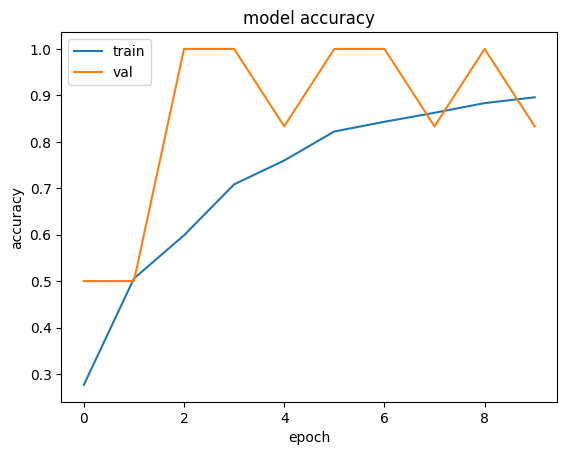

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()